In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/SaYoPillow.csv")

In [ ]:
df

,Snoring range,Respiration rate,Bodu temperature,Limb movement,Blood oxygen,Eye movement,sleeping hour,Heart rate,level of stress
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Snoring range     630 non-null    float64
 1   Respiration rate  630 non-null    float64
 2   Bodu temperature  630 non-null    float64
 3   Limb movement     630 non-null    float64
 4   Blood oxygen      630 non-null    float64
 5   Eye movement      630 non-null    float64
 6   sleeping hour     630 non-null    float64
 7   Heart rate        630 non-null    float64
 8   level of stress   630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


Checking for null values


In [ ]:
df.isnull().sum()

Snoring range       0
Respiration rate    0
Bodu temperature    0
Limb movement       0
Blood oxygen        0
Eye movement        0
sleeping hour       0
Heart rate          0
level of stress     0
dtype: int64

In [ ]:
df.describe()


,Snoring range,Respiration rate,Bodu temperature,Limb movement,Blood oxygen,Eye movement,sleeping hour,Heart rate,level of stress
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


**FEATURE RELATIONSHIP**

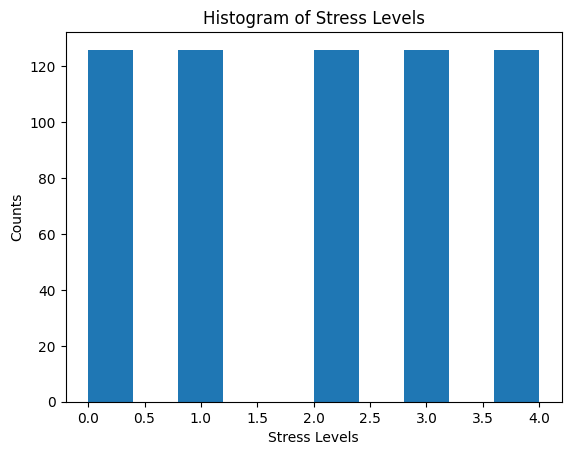

In [ ]:
plt.hist(df['level of stress'])

plt.title('Histogram of Stress Levels')
plt.xlabel('Stress Levels')
plt.ylabel('Counts')

plt.show()

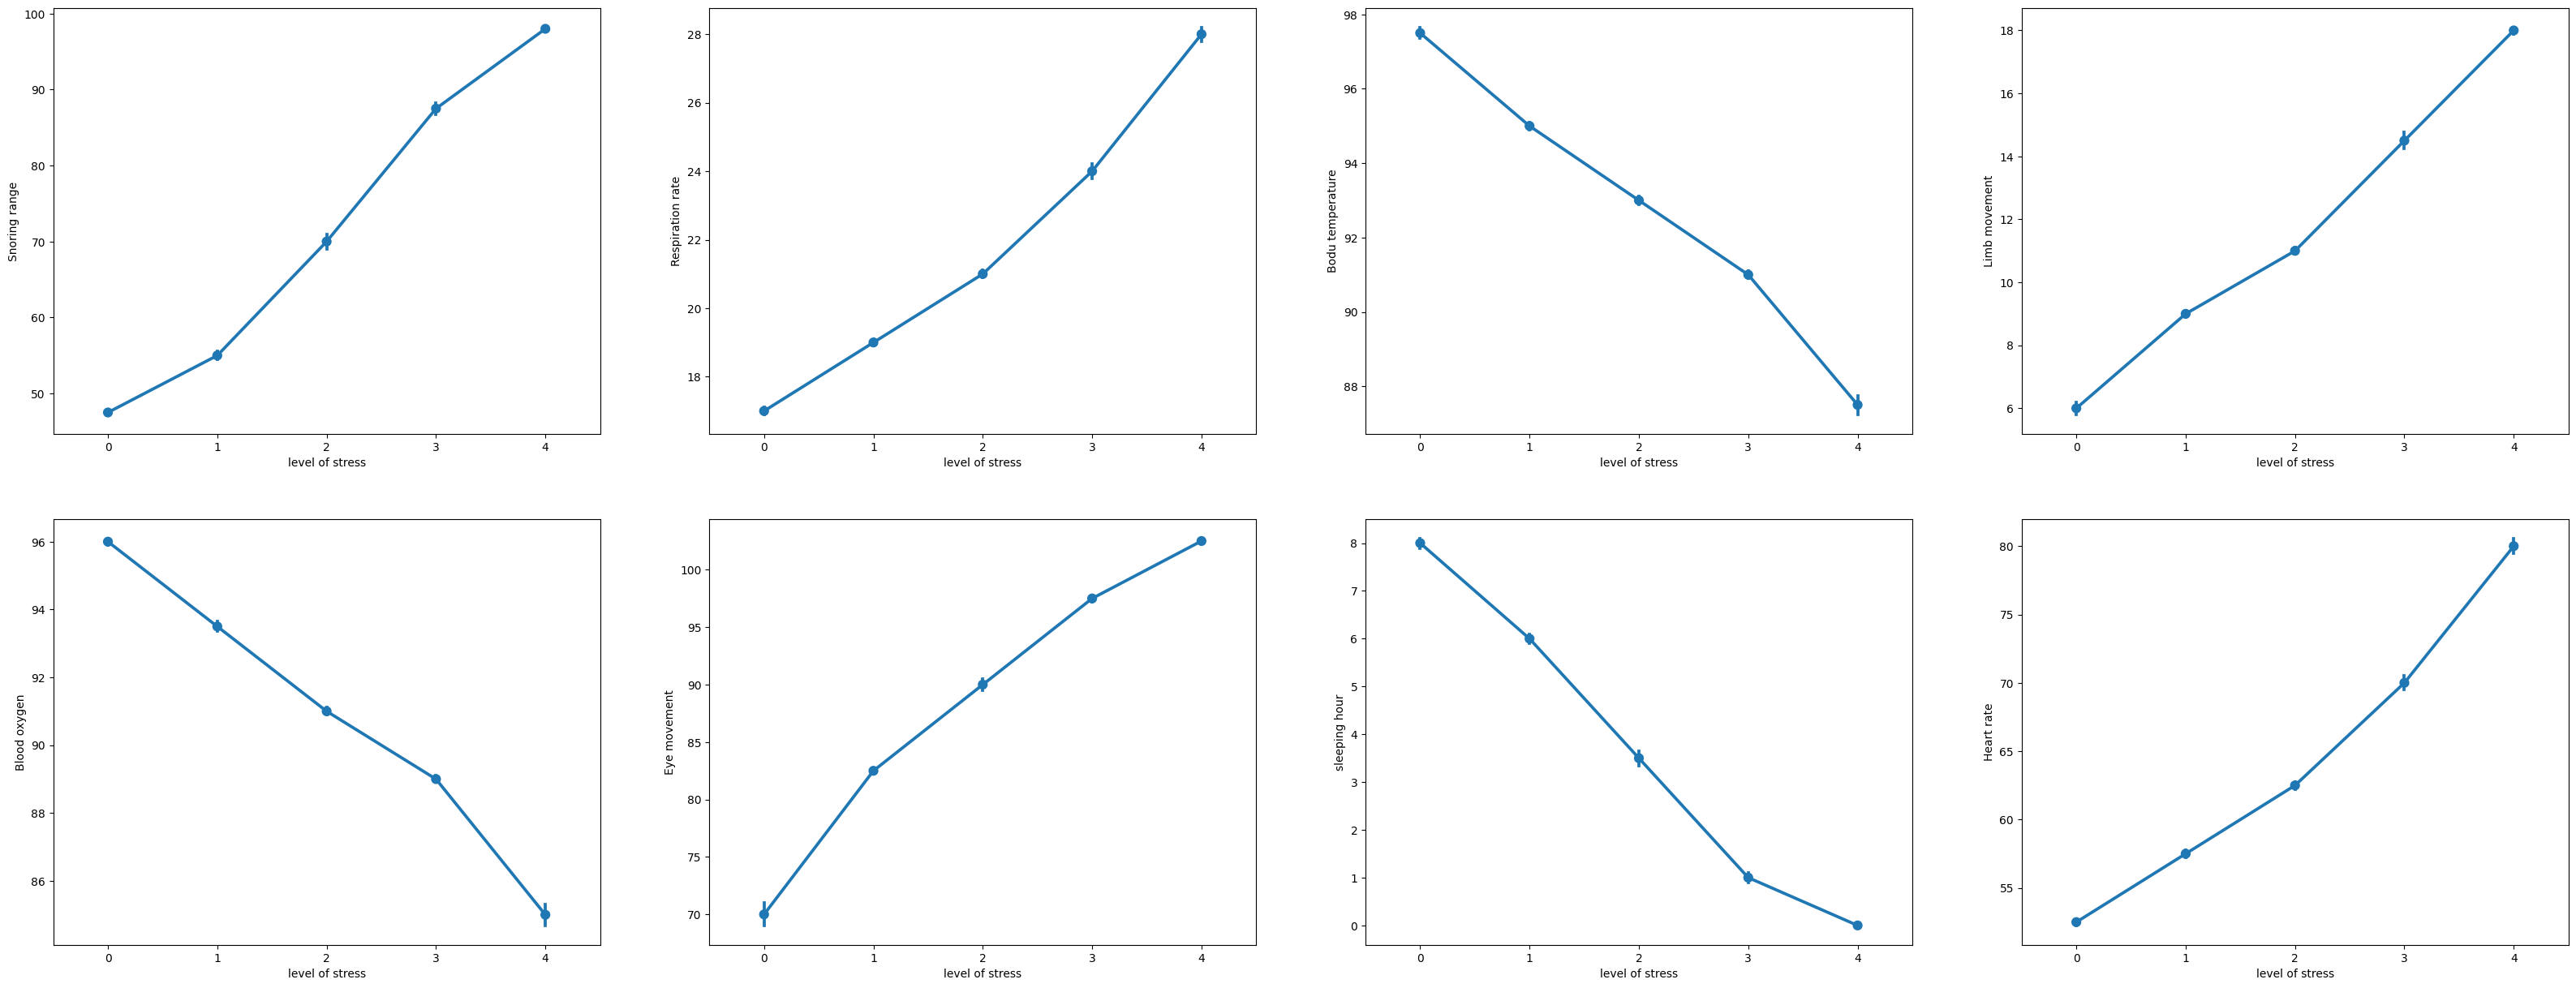

In [ ]:
data = df.copy()
fig = plt.figure(figsize=(40, 15))
rows = 2
columns = 4
for i in range(len(data.columns[:-1])):
  fig.add_subplot(rows, columns, (i+1))
  img = sns.pointplot(x='level of stress',y=df.columns[i],data=df)
plt.show()

CORRELATION BETWEEN DATA

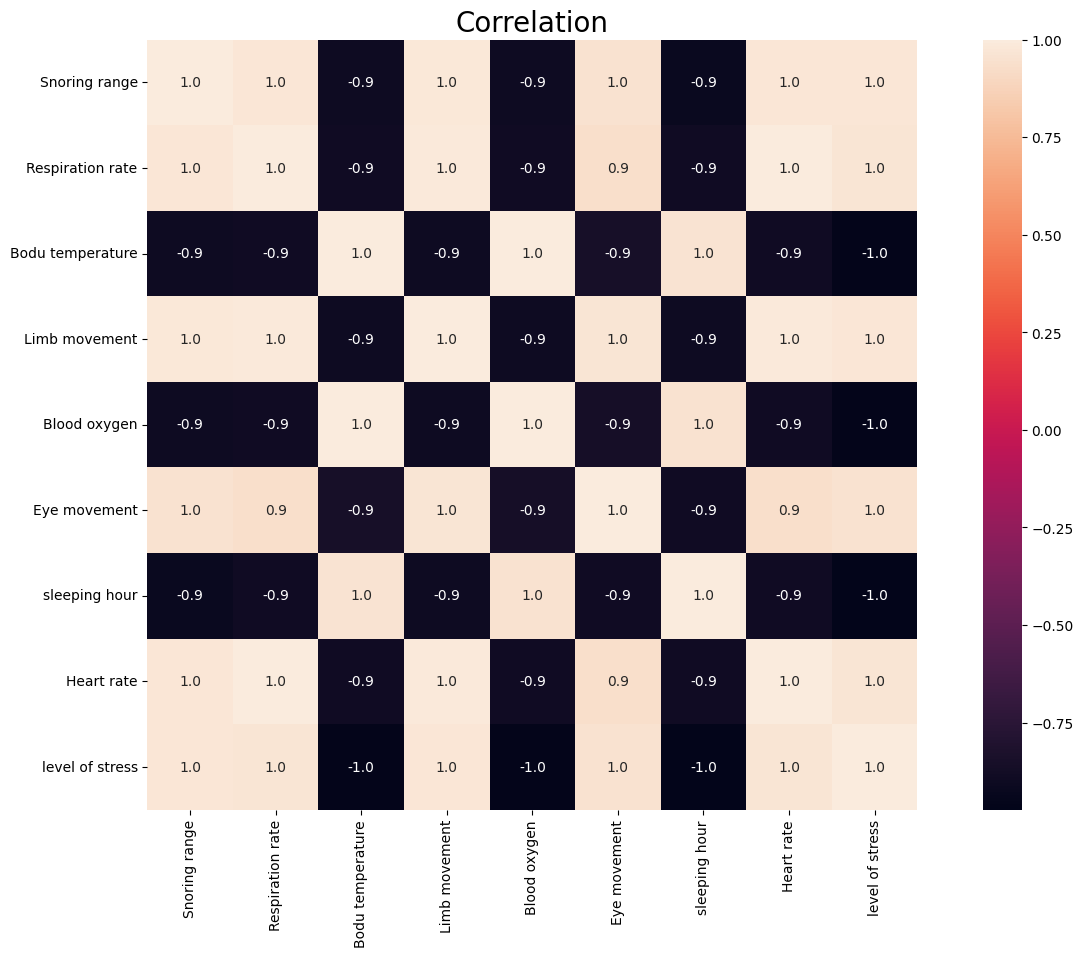

In [ ]:
plt.figure(figsize = (17,10))
sns.heatmap(df.corr(), annot=True, square=True, fmt='.1f')
plt.title('Correlation', fontsize = 20)
plt.show()

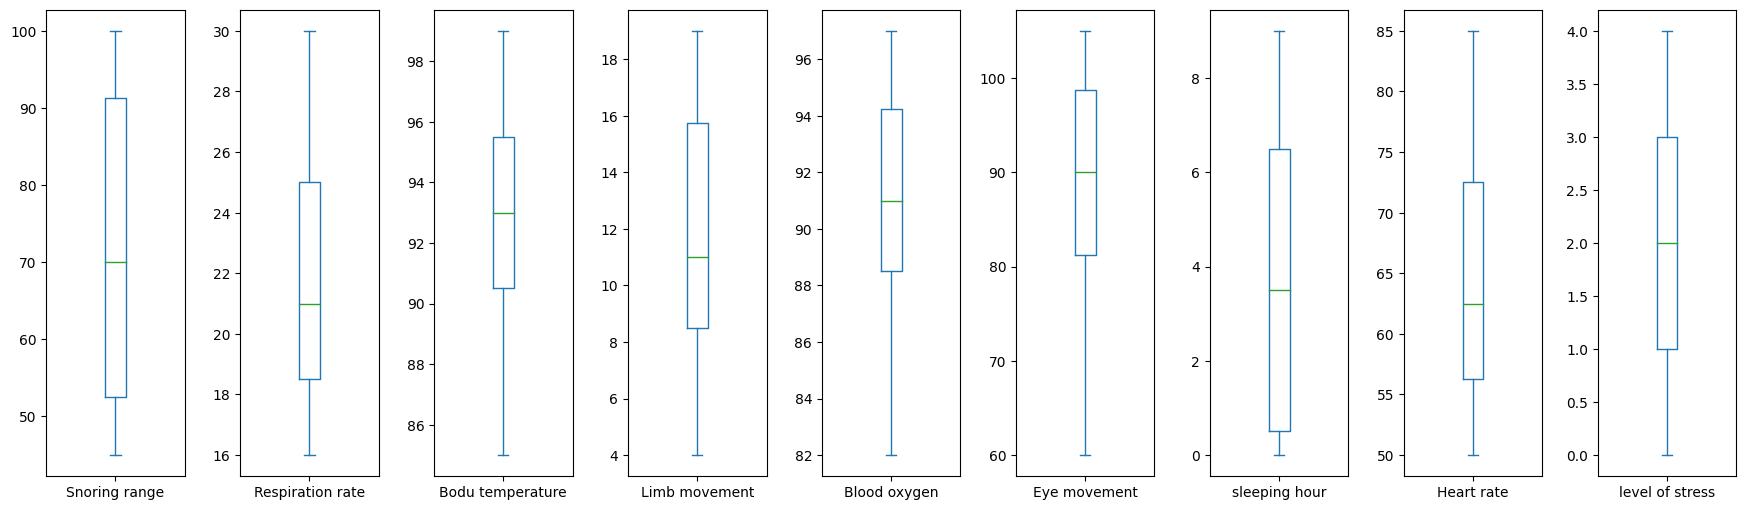

In [ ]:
data.plot(kind='box', subplots=True, layout=(2,14),figsize=(14,14), sharex=False, sharey=False)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

In [ ]:
# X=df.iloc[:,:-1]
X=df.drop("level of stress", axis =1)
Y=df.iloc[:,8]


In [ ]:
X

,Snoring range,Respiration rate,Bodu temperature,Limb movement,Blood oxygen,Eye movement,sleeping hour,Heart rate
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12
...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32


In [ ]:
Y

0      3
1      3
2      1
3      3
4      0
      ..
625    2
626    0
627    4
628    1
629    2
Name: level of stress, Length: 630, dtype: int64

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


K NEIGHBORS CLASSIFIER

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=3)

In [ ]:
classifier.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
Y_pred=classifier.predict(X_test)

[[23  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]


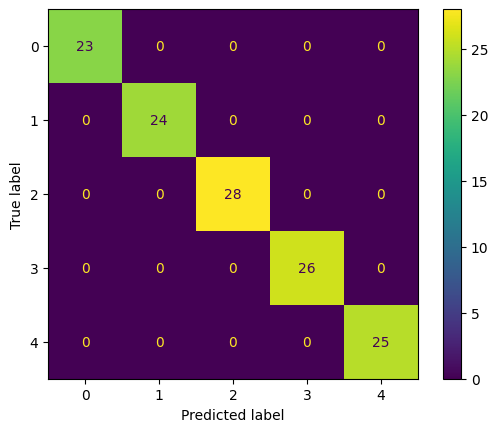

In [ ]:
a= (confusion_matrix(Y_test,Y_pred))
print(a)
cm_display = ConfusionMatrixDisplay(confusion_matrix = a, display_labels = [0,1,2,3,4])
cm_display.plot()
plt.show()
knn_accuracy = accuracy_score(Y_test,Y_pred)*100

In [ ]:
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



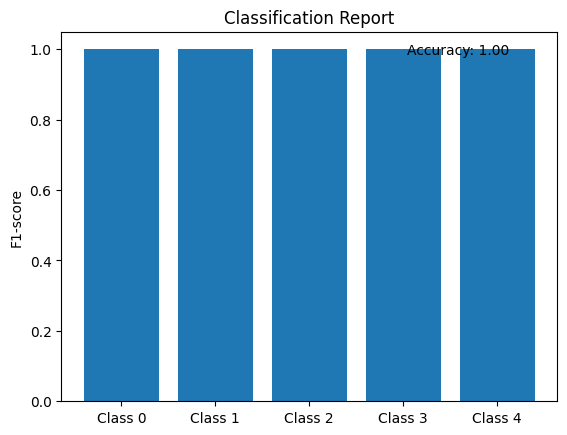

In [ ]:
report = classification_report(Y_test, Y_pred, output_dict=True)
accuracy = accuracy_score(Y_test, Y_pred)

# create a bar chart
x_labels = ['Class '+str(i) for i in range(len(report)-3)]
x_pos = np.arange(len(x_labels))
accuracy_list = [report[str(i)]['f1-score'] for i in range(len(report)-3)]
plt.bar(x_pos, accuracy_list)
plt.xticks(x_pos, x_labels)
plt.ylabel('F1-score')
plt.title('Classification Report')

# add accuracy score to the chart
plt.text(0.8, 0.95, 'Accuracy: {:.2f}'.format(accuracy),
         horizontalalignment='center',
         verticalalignment='center',
         transform=plt.gca().transAxes)

# show the chart
plt.show()

NAIVE BAYES

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [ ]:
Y_pred = classifier.predict(X_test)


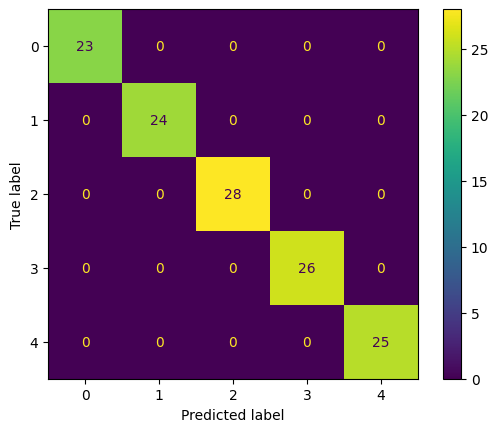

In [ ]:
ac =( accuracy_score(Y_test,Y_pred))*100
cm = confusion_matrix(Y_test, Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0,1,2,3,4])

cm_display.plot()
plt.show()


In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



RANDOM FOREST CLASSIFIER

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
# Predict Output
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, Y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, Y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(Y_test,rf_predicted))
print(confusion_matrix(Y_test,rf_predicted))
print(classification_report(Y_test,rf_predicted))

Random Forest Score: 
 100.0
Random Forest Test Score: 
 99.21
Accuracy: 
 0.9920634920634921
[[23  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 25  1]
 [ 0  0  0  0 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      0.96      0.98        26
           4       0.96      1.00      0.98        25

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126



SVM


In [ ]:

svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, Y_train)
svm_model_score = round(svm_model.score(X_train, Y_train) * 100, 2)
Y_predict = svm_model.predict(X_test)
svm_accuracy = accuracy_score(Y_test,Y_predict)*100
print("Accuracy:",svm_accuracy)
cm = confusion_matrix(Y_test,Y_predict)
print("Confusion Matrix is :", cm)
print(classification_report(Y_test,Y_predict))

Accuracy: 100.0
Confusion Matrix is : [[23  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



LOGISTIC REGRESSION

In [ ]:
logreg = LogisticRegression()

# Train the model using the training sets and check score
logreg.fit(X_train, Y_train)

# Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, Y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, Y_test) * 100, 2)

# Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)

print('Accuracy: \n', accuracy_score(Y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(Y_test,log_predicted))
print('Classification Report: \n', classification_report(Y_test,log_predicted))

Logistic Regression Training Score: 
 100.0
Logistic Regression Test Score: 
 100.0
Accuracy: 
 1.0
Confusion Matrix: 
 [[23  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [ ]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Random Forest','SVM Model', "KNN"],

    'Test Score': [ logreg_score_test, ac, random_forest_score_test,svm_accuracy,knn_accuracy]})
models.sort_values(by='Test Score', ascending=False)

,Model,Test Score
0,Logistic Regression,100.00
1,Gaussian Naive Bayes,100.00
3,SVM Model,100.00
4,KNN,100.00
2,Random Forest,99.21


CHANCES OF MOVING TO NEXT STAGE

In [ ]:
df

,Snoring range,Respiration rate,Bodu temperature,Limb movement,Blood oxygen,Eye movement,sleeping hour,Heart rate,level of stress
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [ ]:
df.dropna(inplace=True)


features = df[['Respiration rate', 'Heart rate', 'Limb movement', 'Snoring range', 'Bodu temperature']].values
labels = df['level of stress'].values

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)


# Step 5: Predict whether a person moves to the next stage or not and assign values to "move_to_next_stage" colum
df['move_to_next_stage'] = 'No'



   # Initialize all values as "No" by default

for level in np.unique(labels):
    # Filter the df for the current sleep stress level
    level_df = df[df['level of stress'] == level]

    if level + 1 in np.unique(labels):
        # Filter the df for the next sleep stress level
        next_level_df = df[df['level of stress'] == level + 1]

        if len(level_df) > 0 and len(next_level_df) > 0:
            # Split the df into features and labels for the next level
            X_train_next = next_level_df[['Respiration rate', 'Heart rate', 'Limb movement', 'Snoring range', 'Bodu temperature']].values
            y_train_next = np.where(next_level_df['level of stress'] == level + 1, 1, 0)

            # Train a random classifier for the next level
            clf_next_level = RandomForestClassifier(random_state=42)
            clf_next_level.fit(X_train_next, y_train_next)

            # Predict the probabilities of moving to the next level for the current level's df
            probabilities = clf_next_level.predict_proba(level_df[['Respiration rate', 'Heart rate', 'Limb movement', 'Snoring range', 'Bodu temperature']].values)[:, -1]

            # Assign "Yes" to the corresponding rows in "move_to_next_stage" column
            df.loc[df['level of stress'] == level, 'move_to_next_stage'] = np.where(probabilities >= 0.5, 'Yes', 'No')

# Print the modified dfset with the "move_to_next_stage" column
print(df['move_to_next_stage'])


0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
625    Yes
626    Yes
627     No
628    Yes
629    Yes
Name: move_to_next_stage, Length: 630, dtype: object


In [ ]:
df['move_to_next_stage'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['move_to_next_stage'].value_counts()

Yes    504
No     126
Name: move_to_next_stage, dtype: int64

DOES HEART RATE DIFFERS BASED ON WHETHER A PERSON MOVES TO THE NEXT SLEEP STAGE OR NOT

In [ ]:
import scipy.stats as stats
move_to_next_stage = df['move_to_next_stage']
heart_rate = df['Heart rate']


In [ ]:
heart_rate_group_1 = heart_rate[move_to_next_stage == 'No']
heart_rate_group_2 = heart_rate[move_to_next_stage == 'Yes']

In [ ]:
statistic, p_value = stats.ttest_ind(heart_rate_group_1, heart_rate_group_2)

In [ ]:
print("Heart Rate Comparison:")
print("Group 1 (No Move to Next Stage): Mean = {:.2f}, Std. Deviation = {:.2f}".format(heart_rate_group_1.mean(), heart_rate_group_1.std()))
print("Group 2 (Move to Next Stage): Mean = {:.2f}, Std. Deviation = {:.2f}".format(heart_rate_group_2.mean(), heart_rate_group_2.std()))
print("Statistical Comparison: t-value = {:.2f}, p-value = {:.4f}".format(statistic, p_value))

Heart Rate Comparison:
Group 1 (No Move to Next Stage): Mean = 80.00, Std. Deviation = 2.92
Group 2 (Move to Next Stage): Mean = 60.62, Std. Deviation = 6.75
Statistical Comparison: t-value = 31.47, p-value = 0.0000


SLEEP QUALITY

In [ ]:
features = df[['Snoring range', 'Respiration rate', 'Limb movement']].values

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features)


KMeans(n_clusters=3, random_state=42)

In [ ]:
cluster_labels = kmeans.labels_

In [ ]:
df['sleep_quality_cluster'] = cluster_labels

In [ ]:
print(df['sleep_quality_cluster'])

0      0
1      0
2      1
3      0
4      1
      ..
625    2
626    1
627    0
628    1
629    2
Name: sleep_quality_cluster, Length: 630, dtype: int32
